In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')


DATA COLLECTION AND PREPARATION

In [ ]:
df= pd.read_csv('Car Dataset (1).csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.isna().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool>

In [ ]:
df['Age'] = 2024 - df['year']
df.drop('year',axis=1,inplace = True)

In [ ]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Age'],
      dtype='object')

In [ ]:
mapping_dict = {"First Owner": 'one', "Second Owner": 'two', "Third Owner": 'three', "Fourth & Above Owner": 'four', "Test Drive Car": 'test car'}
df['owner'] = df['owner'].map(mapping_dict)

DATA VISUALIZATIONS

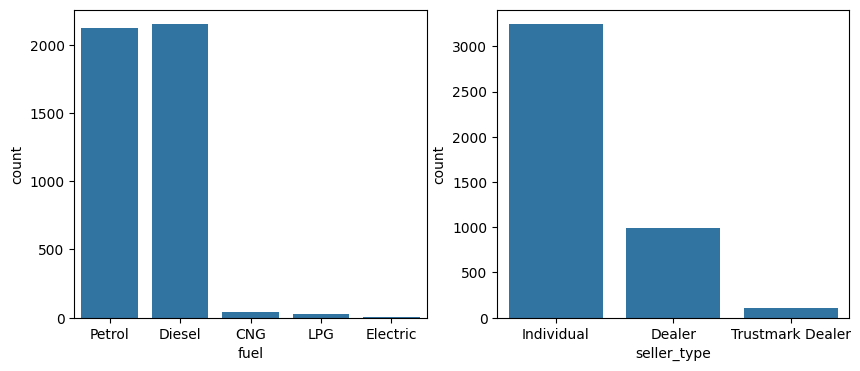

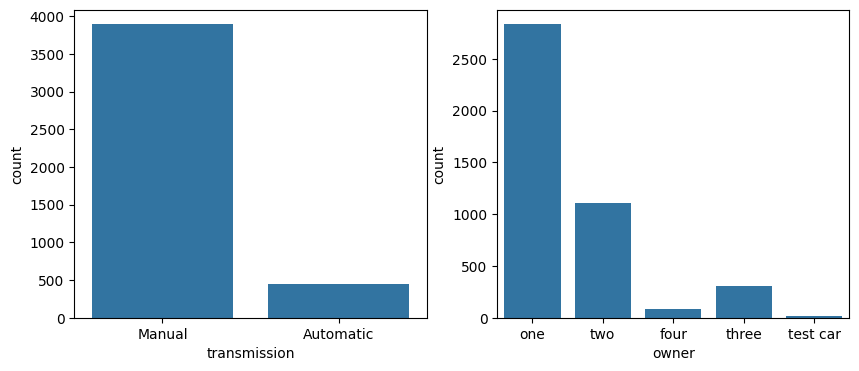

In [ ]:
cat_cols = ['fuel','seller_type','transmission',"owner"]
i=0
while i < 3:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

In [ ]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,one,17
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,one,17
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,one,12
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,one,7
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,two,10


In [ ]:
df["selling_price"].max()

np.int64(8900000)

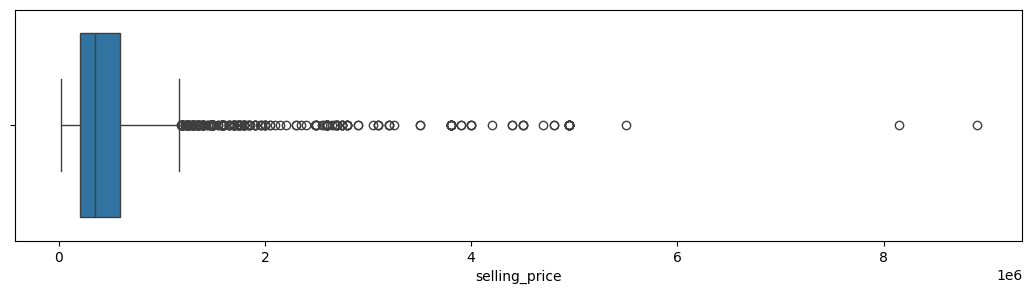

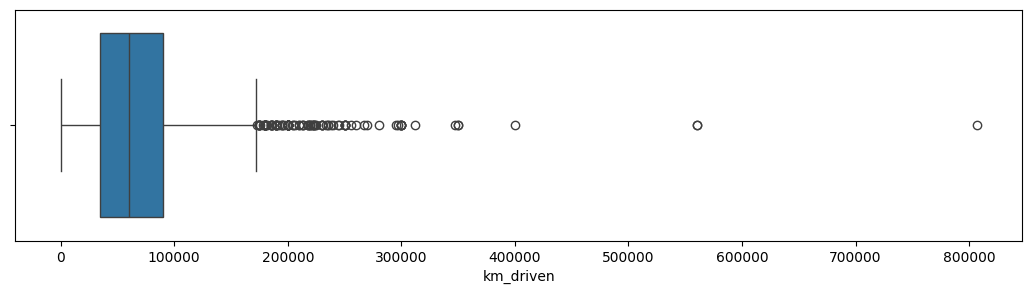

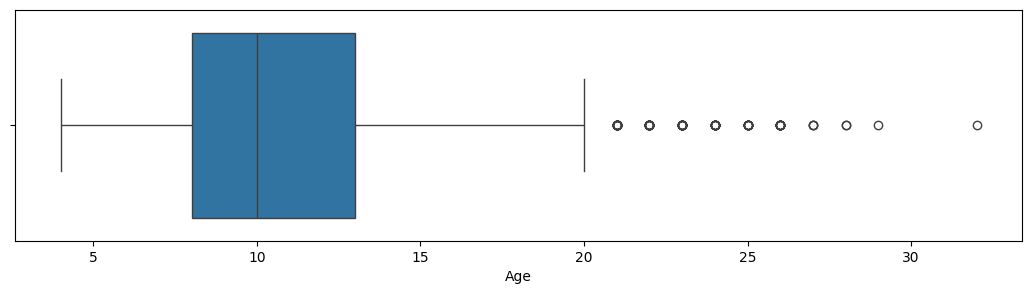

In [ ]:
num_cols = ['selling_price','km_driven','Age']
i=0
while i < 3:
    fig = plt.figure(figsize=[13,3])
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    plt.show()


In [ ]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,one,17
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,one,17
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,one,12
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,one,7
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,two,10


DATA PREPROCESSING

In [ ]:
import numpy as np
df['selling_price'] = np.log1p(df['selling_price'])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['selling_price', 'name'])
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['km_driven', 'Age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


RIDGE REGRESSION WITH OPTUNA

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0)
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_alpha = study.best_params['alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_processed, y_train)
y_pred = best_ridge.predict(X_test_processed)
r2 = r2_score(y_test, y_pred)

print(f"Best R2 Score: {r2:.4f}")
print(f"Best Ridge Alpha: {best_alpha:.4f}")


[I 2024-07-01 15:45:22,797] A new study created in memory with name: no-name-bc68f2b0-a4ad-4f35-9b02-f27949504cb7
[I 2024-07-01 15:45:22,911] Trial 0 finished with value: 0.6869521215426229 and parameters: {'alpha': 5.739449996257935}. Best is trial 0 with value: 0.6869521215426229.
[I 2024-07-01 15:45:22,989] Trial 1 finished with value: 0.6869117790083729 and parameters: {'alpha': 0.20111958871832564}. Best is trial 0 with value: 0.6869521215426229.
[I 2024-07-01 15:45:23,044] Trial 2 finished with value: 0.6869276902007998 and parameters: {'alpha': 7.600467760466205}. Best is trial 0 with value: 0.6869521215426229.
[I 2024-07-01 15:45:23,089] Trial 3 finished with value: 0.686955768112222 and parameters: {'alpha': 5.324161249006602}. Best is trial 3 with value: 0.686955768112222.
[I 2024-07-01 15:45:23,144] Trial 4 finished with value: 0.6869202688883609 and parameters: {'alpha': 0.4747550534034456}. Best is trial 3 with value: 0.686955768112222.
[I 2024-07-01 15:45:23,198] Trial 5 

Best R2 Score: 0.6711
Best Ridge Alpha: 3.7855


GRADIENT BOOSTING REGRESSOR WITH OPTUNA

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    
    model = GradientBoostingRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
    return scores.mean()

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective, n_trials=100)

best_params_gb = study_gb.best_params
best_gb = GradientBoostingRegressor(**best_params_gb, random_state=42)
best_gb.fit(X_train_processed, y_train)
y_pred_gb = best_gb.predict(X_test_processed)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Best R2 Score (Gradient Boosting): {r2_gb:.4f}")
print(f"Best Parameters (Gradient Boosting): {best_params_gb}")


[I 2024-07-01 15:45:29,299] A new study created in memory with name: no-name-c5aa79b2-f229-43f5-a4b8-5937f5b11b09
[I 2024-07-01 15:45:30,155] Trial 0 finished with value: 0.7040529860858065 and parameters: {'n_estimators': 50, 'learning_rate': 0.09569160504434487, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7040529860858065.
[I 2024-07-01 15:45:35,755] Trial 1 finished with value: 0.7021678159926016 and parameters: {'n_estimators': 200, 'learning_rate': 0.08754317942091289, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7040529860858065.
[I 2024-07-01 15:45:38,388] Trial 2 finished with value: 0.710589288633144 and parameters: {'n_estimators': 100, 'learning_rate': 0.05937776598227098, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.710589288633144.
[I 2024-07-01 15:45:41,118] Trial 3 finished with value: 0.7114635003297596 and parameters: {'n_

RANDOM FOREST REGRESSOR WITH OPTUNA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    
    model = RandomForestRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
    return scores.mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=100)

best_params_rf = study_rf.best_params
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train_processed, y_train)
y_pred_rf = best_rf.predict(X_test_processed)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best R2 Score (Random Forest): {r2_rf:.4f}")
print(f"Best Parameters (Random Forest): {best_params_rf}")


[I 2024-07-01 15:14:21,749] A new study created in memory with name: no-name-e3b6b1bd-4239-465f-86f1-abc3b39fac6e
[I 2024-07-01 15:14:27,334] Trial 0 finished with value: 0.6787951171161967 and parameters: {'n_estimators': 250, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6787951171161967.
[I 2024-07-01 15:14:29,563] Trial 1 finished with value: 0.6796106123188925 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6796106123188925.
[I 2024-07-01 15:14:32,632] Trial 2 finished with value: 0.7101445354574223 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.7101445354574223.
[I 2024-07-01 15:14:38,462] Trial 3 finished with value: 0.7100560923068234 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 2 with value

Best R2 Score (Random Forest): 0.6983
Best Parameters (Random Forest): {'n_estimators': 300, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 2}


XGB REGRESSOR WITH OPTUNA

In [ ]:
import xgboost as xgb

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    
    model = xgb.XGBRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
    return scores.mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=100)

best_params_xgb = study_xgb.best_params
best_xgb = xgb.XGBRegressor(**best_params_xgb, random_state=42)
best_xgb.fit(X_train_processed, y_train)
y_pred_xgb = best_xgb.predict(X_test_processed)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Best R2 Score (XGBoost): {r2_xgb:.4f}")
print(f"Best Parameters (XGBoost): {best_params_xgb}")


[I 2024-07-01 15:27:17,551] A new study created in memory with name: no-name-5b8f2627-6b14-4d1f-8278-3ae61362ce0a
[I 2024-07-01 15:27:19,530] Trial 0 finished with value: 0.7086060465958661 and parameters: {'n_estimators': 250, 'learning_rate': 0.010148126551370833, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.709017931691833, 'colsample_bytree': 0.7754098302413961}. Best is trial 0 with value: 0.7086060465958661.
[I 2024-07-01 15:27:20,930] Trial 1 finished with value: 0.697531602211649 and parameters: {'n_estimators': 150, 'learning_rate': 0.09163968955694315, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.6977079509012625, 'colsample_bytree': 0.8766998939587304}. Best is trial 0 with value: 0.7086060465958661.
[I 2024-07-01 15:27:23,685] Trial 2 finished with value: 0.7029696363746062 and parameters: {'n_estimators': 300, 'learning_rate': 0.04939217424650557, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.5056329582393155, 'colsample_bytree': 0.96695236321275

Best R2 Score (XGBoost): 0.7055
Best Parameters (XGBoost): {'n_estimators': 300, 'learning_rate': 0.01543793152494427, 'max_depth': 10, 'min_child_weight': 6, 'subsample': 0.6833902975738065, 'colsample_bytree': 0.5541731154277095}


COMPARISON OF R2 SCORES OF DIFFERENT MODELS

In [ ]:

models = ["Ridge",'Gradient Boosting', 'Random Forest', 'XGBoost']
r2_scores = [0.6711,0.7037,0.6983, 0.7055]

results_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores
})

print(results_df)


               Model  R2 Score
0              Ridge    0.6711
1  Gradient Boosting    0.7037
2      Random Forest    0.6983
3            XGBoost    0.7055


CONCLUSION : FROM THE RESULTS WE CAN SEE THAT XGBOOST REGRESSOR PERFORMS WITH A R2 SCORE OF "0.7055" WHICH IS BEST AMONG OTHER MODELS